In [14]:
import numpy as np
import tensorflow as tf 
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.optimizers import SGD,Adam,RMSprop,Adagrad
import matplotlib.pyplot as plt

In [15]:
# Load CIFAR-10 dataset
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()


In [16]:
# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a simple CNN model
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    return model


Training with SGD
Epoch 1/10
782/782 - 10s - 13ms/step - accuracy: 0.1821 - loss: 2.2045 - val_accuracy: 0.2333 - val_loss: 2.0294
Epoch 2/10
782/782 - 9s - 12ms/step - accuracy: 0.2941 - loss: 1.9447 - val_accuracy: 0.3221 - val_loss: 1.8723
Epoch 3/10
782/782 - 9s - 12ms/step - accuracy: 0.3621 - loss: 1.7681 - val_accuracy: 0.3990 - val_loss: 1.6643
Epoch 4/10
782/782 - 9s - 12ms/step - accuracy: 0.4190 - loss: 1.6111 - val_accuracy: 0.3653 - val_loss: 1.9008
Epoch 5/10
782/782 - 8s - 10ms/step - accuracy: 0.4617 - loss: 1.5024 - val_accuracy: 0.4734 - val_loss: 1.4586
Epoch 6/10
782/782 - 8s - 10ms/step - accuracy: 0.4904 - loss: 1.4217 - val_accuracy: 0.3668 - val_loss: 2.1525
Epoch 7/10
782/782 - 8s - 10ms/step - accuracy: 0.5178 - loss: 1.3597 - val_accuracy: 0.5021 - val_loss: 1.3842
Epoch 8/10
782/782 - 8s - 10ms/step - accuracy: 0.5346 - loss: 1.3098 - val_accuracy: 0.4908 - val_loss: 1.4394
Epoch 9/10
782/782 - 8s - 10ms/step - accuracy: 0.5539 - loss: 1.2597 - val_accuracy

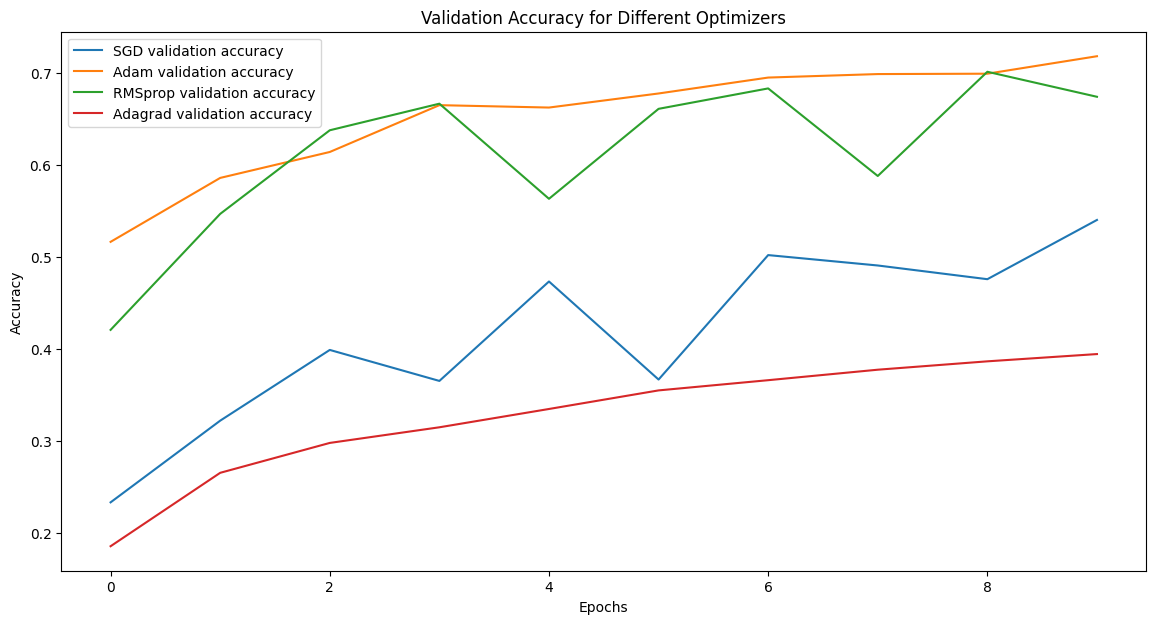

In [17]:
# Compile and train the model with different optimizers
def train_with_optimizer(optimizer, optimizer_name):
    model = create_model()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    print(f"\nTraining with {optimizer_name}")
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64, verbose=2)
    
    # Evaluate the model
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f"Test accuracy with {optimizer_name}: {test_acc}")
    
    return history.history['accuracy'], history.history['val_accuracy'], optimizer_name


optimizers = [
    (SGD(), 'SGD'),
    (Adam(), 'Adam'),
    (RMSprop(), 'RMSprop'),
    (Adagrad(), 'Adagrad')
]

histories = []
for opt, name in optimizers:
    acc, val_acc, opt_name = train_with_optimizer(opt, name)
    histories.append((acc, val_acc, opt_name))


plt.figure(figsize=(14, 7))
for acc, val_acc, name in histories:
    plt.plot(val_acc, label=f'{name} validation accuracy')
plt.title('Validation Accuracy for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()